This code is all about colorizing a grayscale image using a pre-trained deep neural network model. Let's break it down step by step:

1. **Importing Libraries:**
   - `numpy` for numerical operations.
   - `matplotlib.pyplot` for plotting images.
   - `cv2` (OpenCV) for computer vision tasks.

2. **Loading the Test Image:**
   - Reads a grayscale image specified by the file path using OpenCV.
   - Checks if the image is loaded successfully.

3. **Displaying the Original Image:**
   - If the image is loaded successfully, it is displayed using Matplotlib with a gray colormap and bicubic interpolation.

4. **Setting Paths for Model and Data:**
   - Specifies paths for the Caffe model, prototxt file, and numpy file.

5. **Loading the Caffe Model:**
   - Reads the Caffe model and sets up some layers for colorization.

6. **Image Pre-processing:**
   - Reads the test image again and converts it from BGR to grayscale and then to RGB format using OpenCV.
   - Normalizes the image values.
   - Converts the RGB image into LAB format.

7. **Extracting L Channel:**
   - Resizes the LAB image.
   - Extracts the L channel (luminance) and subtracts 50 from its values.

8. **Predicting a and b Channels:**
   - Sets the L channel as input to the pre-trained network.
   - Predicts the 'a' and 'b' channels for colorization.

9. **Combining Channels:**
   - Combines the original L channel with the predicted 'a' and 'b' channels to create a colored LAB image.

10. **Converting LAB to RGB:**
    - Converts the LAB image back to RGB format.

11. **Adjusting Pixel Values:**
    - Clips and scales pixel values to the [0, 255] range.

12. **Displaying Colored Image:**
    - Displays the colored image using Matplotlib.

13. **Saving the Colored Image:**
    - Converts the RGB image to BGR format (OpenCV convention) and saves it to the specified output path.

In summary, the code takes a grayscale image, processes it through a pre-trained neural network to predict color channels, and then displays and saves the resulting colorized image.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Importing Libraries:**
   - `numpy` for numerical operations.
   - Importing numpy gives you access to efficient numerical operations and multi-dimensional arrays.
   
   - `matplotlib.pyplot` for plotting images.
   - Matplotlib.pyplot, commonly known as plt, is used for data visualization, allowing you to plot images and graphs easily. 
   
   - `cv2` (OpenCV) for computer vision tasks.
   - CV2, or OpenCV, stands as a robust computer vision library, facilitating complex image processing, machine vision applications, and computer graphics.
   
   These libraries collectively empower developers with a rich toolkit for diverse computational tasks.

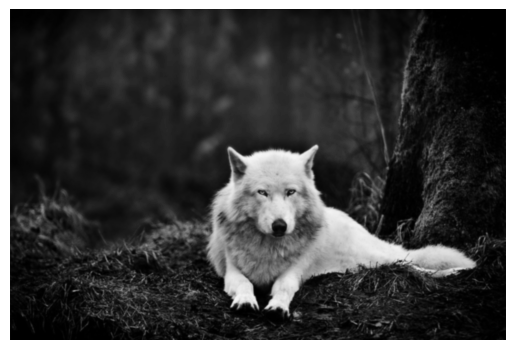

In [2]:
# Name of testing image
image_path = 'wolf_in_nature.jpg'

# Load the image
test_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if test_image is not None:
    # Display the image with gray colormap and bicubic interpolation
    plt.imshow(test_image, cmap='gray', interpolation='bicubic')
    plt.axis('off')
    plt.show()
else:
    print("Error: Unable to load the image.")

### **Displaying the Original Image:**

   - This segment handles image loading and verification. The image_path variable holds the file name in this case 'whale.jpg.' The image is loaded using OpenCV's cv2.imread() function, with the flag cv2.IMREAD_GRAYSCALE and stored in the test_image variable, indicating that it should be read as a grayscale image. The script then checks if the image is successfully loaded. If it is, the image is displayed using Matplotlib with a gray colormap and bicubic interpolation. In case of any loading issues, an error message is printed.

In [3]:
# Path of our caffemodel, prototxt, and numpy files
prototxt = "colorization_deploy_v2.prototxt"
caffe_model = "colorization_release_v2.caffemodel"
pts_npy = "pts_in_hull.npy"

test_image =  "test_samples/" + image_path

# Loading our model
net = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)
 
layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

55
53


### Configuration deeplearning framework

- In this segment, the focus is on configuring the colorization model for subsequent image processing. Paths to the prototxt file ("colorization_deploy_v2.prototxt"), caffemodel file ("colorization_release_v2.caffemodel"), and numpy file containing color points ("pts_in_hull.npy") are established. Additionally, the test image path is generated by appending the original image path with the "test_samples" directory.

- The colorization model is loaded using OpenCV's cv2.dnn.readNetFromCaffe function, and the color points are loaded into the pts variable using NumPy. Layer IDs for "class8_ab" and "conv8_313_rh" are retrieved, and the color points are appropriately reshaped and assigned to these layers within the model. This section lays the groundwork for the subsequent colorization process.


### Model and Data:

- Digging a bit deeper, Caffe is known for its modularity and expressiveness. It's like having a set of LEGO blocks to construct intricate models for various tasks, such as image classification or object detection.

- prototxt is a crucial component in the Caffe framework. think of it as the model for building neural networks in Caffe. It is a text file that defines the structure and parameters of the network. Just like a recipe with a list of ingredients and instructions, it allows researchers and developers to define the architecture of a neural network without delving into complex code. It's like a document that describes the layers, their types, sizes and connections in a clear and organized way.

- Think of pts_in_hull.npy as a secret coloring map that stores specific information in your computer's memory. This type of file becomes especially relevant in scenarios where computational efficiency is crucial, such as real-time image processing or advanced core manipulation tasks.

#### These identifiers, "class8_ab" and "conv8_313_rh," correspond to specific layers in the colorization neural network. Let's break down their roles:

#### 1."class8_ab" Layer:

- This layer is primarily tasked with predicting the 'a' and 'b' channels within the LAB color space.
- It essentially determines the chromatic characteristics of the image, specifying how color variations should be applied.
- Operating as a critical element in the initial stages of colorization, "class8_ab" lays the foundation for the subsequent refinement.

#### 2."conv8_313_rh" Layer:

- Positioned as a refinement layer in the neural network architecture.
- Its role involves fine-tuning and enhancing the initial color predictions generated by the "class8_ab" layer.
- By meticulously adjusting the color details, "conv8_313_rh" contributes to the creation of a high-quality and visually appealing colorized output.

- In essence, these layers collaboratively orchestrate the intricate process of transforming a grayscale image into a richly colored representation.

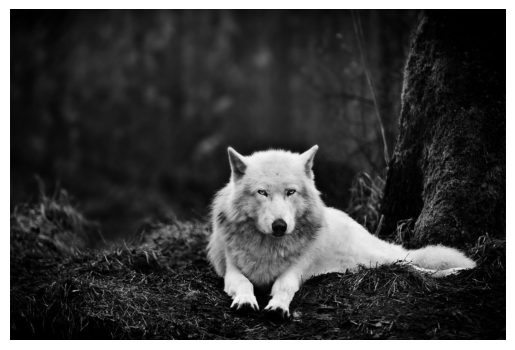

In [4]:
# Converting the image into RGB and plotting it
# Read image from the path
test_image = cv2.imread(test_image)
# Convert image into gray scale
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Convert image from gray scale to RGB format
test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)
# Check image using matplotlib
plt.imshow(test_image)
plt.axis('off')
plt.show()

### Image Pre-processing:
1. **Reading the Image:**
    - The image is loaded from the specified path using OpenCV's cv2.imread() function and stored in the variable test_image.

2. **Grayscale Conversion:**
    - The loaded image, initially in BGR (blue, green, red) format, undergoes conversion to grayscale using cv2.cvtColor().

3. **RGB Conversion:**
    - The grayscale image is subsequently converted to RGB format using cv2.cvtColor() again, this time with the flag cv2.COLOR_GRAY2RGB.

4. **Displaying the Image:**
    - Matplotlib is employed for visualizing the RGB image. The plt.imshow() function is utilized, and the axis labels are turned off (plt.axis('off')) to present a clean and focused representation of the transformed image. Finally, the image is displayed using plt.show().

In [5]:
# Converting the RGB image into LAB format
# Normalizing the image
normalized = test_image.astype("float32") / 255.0
# Converting the image into LAB
lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)
# Resizing the image
resized = cv2.resize(lab_image, (224, 224), interpolation=cv2.INTER_CUBIC)
# Extracting the value of L for LAB image
L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50

First, we make sure all colors follow the same rules, such as 0 to 1. This is called normalization. Then, we transform the image into LAB format, which is like a special color code.

2. **Normalizing the Image:**
   - Using cv2.cvtColor(), the normalized image is converted from RGB to LAB color space, a color representation that separates luminance (L) from chromatic information (a and b channels).

2. **Resizing the Image:**
   - The LAB image undergoes a resizing operation, adjusting its dimensions to 224x224 through cv2.resize(). The interpolation method used is cubic for smoother transitions.

3. **Extracting L Channel:**
   - The luminance (L) channel, representing the brightness of the image, is extracted from the resized LAB image using cv2.split().

4. **AdjustingL Channel:**
   - The luminance values ​​are modified by subtracting 50, effectively darkening the overall brightness. Alternatively, this adjustment could be expressed as L = L - 50. This step contributes to the overall tonal balance of the image.

In [6]:
# Predicting a and b values
# Setting input
net.setInput(cv2.dnn.blobFromImage(L))
# Finding the values of 'a' and 'b'
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
# Resizing
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))

Alright, so we have this super smart color assistant and want it to predict which colors should match the brightness of your image. We prepare the brightness part, pass it to the assistant and it informs the values ​​'a' and 'b', which are like secret codes for colors. After that, we resize the color predictions to match the size of the original image.

1. **Setting Input:**
    - The luminance values (L channel), indicative of image brightness, are set as the input to the neural network using net.setInput().

2. **Predicting 'a' and 'b' Values:**
    - The neural network is then utilized to predict the 'a' and 'b' values associated with colorization through net.forward(). The resulting array is of 3D structure, and it is transposed to reorganize its dimensions.

3. **Resizing:**
    - The predicted 'a' and 'b' values undergo a resizing operation to ensure alignment with the original dimensions of the test image. This step is crucial for integrating the color predictions seamlessly into the final colorized output.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


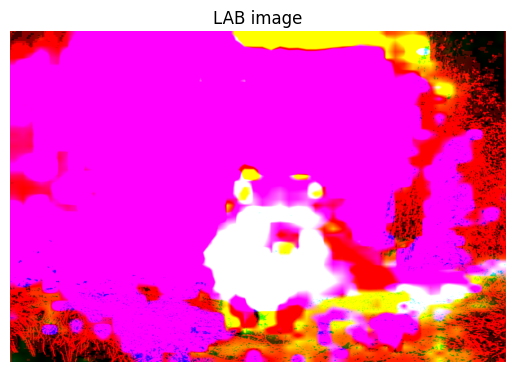

In [7]:
# Combining L, a, and b channels
L = cv2.split(lab_image)[0]
# Combining L,a,b
LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
# Checking the LAB image
plt.imshow(LAB_colored)
plt.title('LAB image')
plt.axis('off')
plt.show()


### LAB Image:

So now we have these separate parts of our image: the brightness, the secret code for color 'a' and the secret code for color 'b'. Now let's put the pieces together, using this code to merge them, creating a colorful image in LAB format.

1. **Extracting L Channel:**
    - The luminance ('L') channel is extracted from the LAB image using cv2.split().

2. **Combining Channels:**
    - The 'L' channel is combined with the previously predicted 'a' and 'b' values using np.concatenate(). This operation results in a 3-channel LAB-colored image, encapsulating both brightness and color information.

3. **Visualizing the LAB Image:**
    - The LAB-colored image is visualized using Matplotlib, with the axis turned off for a more streamlined presentation. The title 'LAB image' is incorporated to denote the color space, providing a clear reference for understanding the composition of the displayed image.

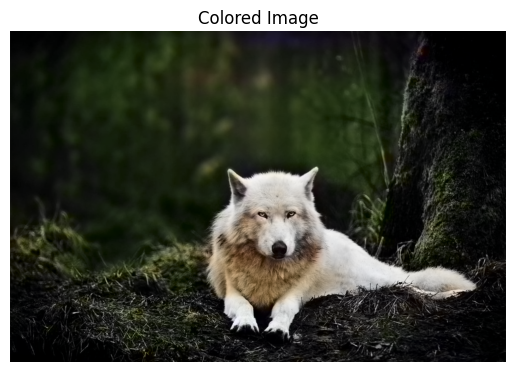

In [8]:
## Converting LAB image to RGB
RGB_colored = cv2.cvtColor(LAB_colored, cv2.COLOR_LAB2RGB)
# Limits the values in array
RGB_colored = np.clip(RGB_colored, 0, 1)
# Changing the pixel intensity back to [0,255], as we did scaling during pre-processing and converted the pixel intensity to [0,1]
RGB_colored = (255 * RGB_colored).astype("uint8")
# Checking the image
plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.axis('off')
plt.show()

Finally, we will transform our LAB masterpiece and now it's time to make it understandable to everyone. using our coding skills to convert it back to a normal RGB image. But we don't want wild colors, so we'll set some limits. Then, we will adjust the color intensity back to the normal range and that's it!

1. **LAB to RGB Conversion:**
    - The LAB-colored image is transformed back to RGB format using cv2.cvtColor().

2. **Limiting Values:**
    - The values in the RGB-colored array are clipped to ensure they remain within the valid range of 0 to 1.

3. **Scaling Pixel Intensity:**
    - The pixel intensity values are rescaled from the normalized range (0 to 1) to the original scale (0 to 255). This involves multiplying by 255 and casting the result to the "uint8" data type.

4. **Visualizing the Colored Image:**
    - The final RGB-colored image is visualized using Matplotlib. The axis is turned off for a cleaner presentation, and the title 'Colored Image' is included for context and clarity.

In [9]:
# Saving the colored image
# Converting RGB to BGR
RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)
# Saving the image in the desired path
outImage = 'outImg.jpeg'

cv2.imwrite(outImage, RGB_BGR)

True

## Enjoy:
In this concluding part, the code addresses the final step of the colorization process: saving the colorized image. 

1. **Converting RGB to BGR:**
    - The RGB-colored image is converted to BGR format using cv2.cvtColor(). This conversion is essential as OpenCV conventionally expects images in BGR format for saving.

2. **Saving the Image:**
    - The colorized image is saved at the specified path ('outImg.jpeg') using cv2.imwrite(). This step encapsulates the entire colorization workflow, producing a tangible output stored for future reference or distribution.